# Outline

### Research Question:

What indicators are significant in predicting whether a business will lose its business liscence, whether it be revoked or cancelled?

### Goal:

Build a classifier model that predicts if a business will change it's lisence status from issued to canceled or revoked.

### Link:
https://www.kaggle.com/chicago/chicago-business-licenses-and-owners#socrata_metadata_business-owners.json

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('business-licenses.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,12,16,17,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,16570-20000216,76522,51755,1,THORNDALE CONSTRUCTION,THORNDALE CONSTRUCTION,11243 CHESAPEAKE PLAC 1ST,WESTCHESTER,IL,60154,...,2000-02-16T00:00:00,2001-02-15T00:00:00,2003-12-22T00:00:00,2009-08-24T00:00:00,AAI,NaN,NaN,NaN,NaN,NaN
1,18136-19960216,84172,51944,1,P & W CONSTRUCTION CO INC,P & W CONSTRUCTION CO INC,5410 NEWPORT DR 40,ROLLING MEADOWS,IL,60008,...,1996-02-16T00:00:00,1997-02-15T00:00:00,2003-12-22T00:00:00,2006-04-12T00:00:00,AAI,NaN,NaN,NaN,NaN,NaN
2,25710-19960216,119268,52896,1,"PAT HAMILTON, INC",PAT HAMILTON CO.,17021 S MAGNOLIA DR 1ST,HAZEL CREST,IL,60429,...,1996-02-16T00:00:00,1997-02-15T00:00:00,2003-12-22T00:00:00,2006-04-12T00:00:00,AAI,NaN,NaN,NaN,NaN,NaN
3,36408-19970216,168920,54389,1,STEVEN FELDMAN,STEVEN FELDMAN,450 SKOKIE BLVD 904,NORTHBROOK,IL,60062,...,1997-02-16T00:00:00,1998-02-15T00:00:00,2003-12-22T00:00:00,2006-04-12T00:00:00,AAI,NaN,NaN,NaN,NaN,NaN
4,44261-19960216,205258,55668,1,J C THOMAS CO INC,"J.C.THOMAS CO.,INC.",261 N WEST AVE 1ST,ELMHURST,IL,60126,...,1996-02-16T00:00:00,1997-02-15T00:00:00,2003-12-22T00:00:00,2006-04-12T00:00:00,AAI,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
949718,2626837-20181001,2626837,431615,1,"EDU Healthcare, LLC","EDU Healthcare, LLC",55 E MONROE ST 3800,CHICAGO,IL,60603,...,2018-10-01T00:00:00,2020-10-15T00:00:00,2018-09-29T00:00:00,2018-10-01T00:00:00,AAI,NaN,NaN,41.880688,-87.625644,"{'latitude': '41.880687878501604', 'longitude'..."
949719,2492605-20181016,2620768,410364,1,"Michael Dudak Tax & Accounting, LLC","Michael Dudak Tax & Accounting, LLC",5428 S SAYRE AVE,CHICAGO,IL,60638,...,2018-10-16T00:00:00,2020-10-15T00:00:00,2018-09-30T00:00:00,2018-10-01T00:00:00,AAI,NaN,NaN,41.793126,-87.796634,"{'latitude': '41.793125544774824', 'longitude'..."
949720,2065191-20181116,2625064,357848,1,"ASSET, INC.","ASSET, INC.",2910 S WENTWORTH AVE 1ST,CHICAGO,IL,60616,...,2018-11-16T00:00:00,2020-11-15T00:00:00,2018-09-29T00:00:00,2018-10-01T00:00:00,AAI,NaN,NaN,41.840815,-87.631884,"{'latitude': '41.840815262061376', 'longitude'..."
949721,2021498-20180916,2613450,351126,1,JASON CAI INC.,JASON WOK,1014 S WESTERN AVE 1,CHICAGO,IL,60612,...,2018-09-16T00:00:00,2020-09-15T00:00:00,2018-10-01T00:00:00,2018-10-01T00:00:00,AAI,NaN,NaN,41.868784,-87.686245,"{'latitude': '41.86878383901946', 'longitude':..."
949722,2626921-20181001,2626921,431645,1,THOMAS O WALKER,Walker & Associates,4464 N MILWAUKEE AVE,CHICAGO,IL,60630,...,2018-10-01T00:00:00,2020-10-15T00:00:00,2018-09-28T00:00:00,2018-10-01T00:00:00,AAI,NaN,NaN,41.962256,-87.756060,"{'latitude': '41.96225621020349', 'longitude':..."


In [5]:
df.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [6]:
df[['LICENSE STATUS']].head()

,LICENSE STATUS
0,AAI
1,AAI
2,AAI
3,AAI
4,AAI


In [7]:
df[['LICENSE STATUS']].tail()

,LICENSE STATUS
949718,AAI
949719,AAI
949720,AAI
949721,AAI
949722,AAI


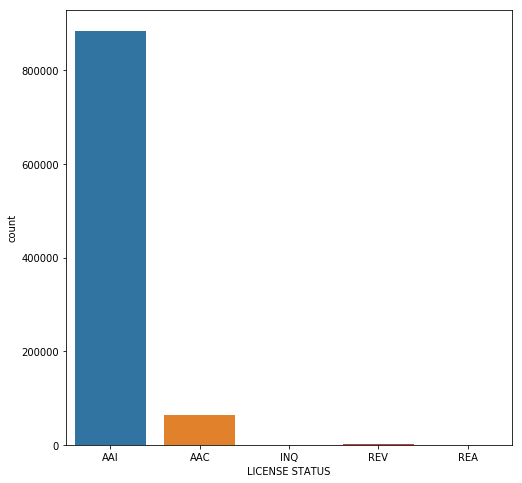

In [8]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='LICENSE STATUS', data=df)

In [9]:
df.groupby('LICENSE STATUS').count()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
LICENSE STATUS,,,,,,,,,,,,,,,,,,,,,
AAC,63987,63987,63987,63987,63987,63984,63987,63987,63987,63965,...,63987,63838,63963,60047,63987,63987,16557,58903,58903,58903
AAI,884786,884786,884786,884786,884782,884741,884786,884783,884774,884427,...,884786,882305,884725,841613,884786,0,229638,817138,817138,817138
INQ,5,5,5,5,5,5,5,5,5,5,...,5,4,5,3,5,5,0,3,3,3
REA,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,3,11,11,11
REV,934,934,934,934,934,934,934,934,934,934,...,934,934,934,930,934,934,311,926,926,926


In [10]:
63987/884786

0.07231918226554218

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949723 entries, 0 to 949722
Data columns (total 34 columns):
ID                                   949723 non-null object
LICENSE ID                           949723 non-null int64
ACCOUNT NUMBER                       949723 non-null int64
SITE NUMBER                          949723 non-null int64
LEGAL NAME                           949719 non-null object
DOING BUSINESS AS NAME               949675 non-null object
ADDRESS                              949723 non-null object
CITY                                 949720 non-null object
STATE                                949711 non-null object
ZIP CODE                             949342 non-null object
WARD                                 879723 non-null float64
PRECINCT                             852145 non-null float64
WARD PRECINCT                        879896 non-null object
POLICE DISTRICT                      857267 non-null float64
LICENSE CODE                         949723 non-n

In [12]:
# Drop Irrelevant Columns that have many missing values
df = df.drop(columns=['BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY', 'APPLICATION CREATED DATE', 'LICENSE STATUS CHANGE DATE', 'LICENSE STATUS CHANGE DATE', 'SSA'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949723 entries, 0 to 949722
Data columns (total 29 columns):
ID                                   949723 non-null object
LICENSE ID                           949723 non-null int64
ACCOUNT NUMBER                       949723 non-null int64
SITE NUMBER                          949723 non-null int64
LEGAL NAME                           949719 non-null object
DOING BUSINESS AS NAME               949675 non-null object
ADDRESS                              949723 non-null object
CITY                                 949720 non-null object
STATE                                949711 non-null object
ZIP CODE                             949342 non-null object
WARD                                 879723 non-null float64
PRECINCT                             852145 non-null float64
WARD PRECINCT                        879896 non-null object
POLICE DISTRICT                      857267 non-null float64
LICENSE CODE                         949723 non-n

In [13]:
# Remove all null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804366 entries, 49662 to 949721
Data columns (total 29 columns):
ID                                   804366 non-null object
LICENSE ID                           804366 non-null int64
ACCOUNT NUMBER                       804366 non-null int64
SITE NUMBER                          804366 non-null int64
LEGAL NAME                           804366 non-null object
DOING BUSINESS AS NAME               804366 non-null object
ADDRESS                              804366 non-null object
CITY                                 804366 non-null object
STATE                                804366 non-null object
ZIP CODE                             804366 non-null object
WARD                                 804366 non-null float64
PRECINCT                             804366 non-null float64
WARD PRECINCT                        804366 non-null object
POLICE DISTRICT                      804366 non-null float64
LICENSE CODE                         804366 n